# Intro to Hierarchical Bayes

##### *"Conditional probabilities play an important role in investigating causal questions, as we often want to compare how the probability (or, equivalently, risk) of an outcome changes under different filtering, or exposure, conditions."* - Judea Pearl

The analogy to keep with us when parsing the language of probabilities is a *frequency table.* Here, imagine we're pulling random objects out of a hat, each with a shape and color. The frequency table below lists the number of objects with a given shape and color residing in the hat. From this information, we'll explore notions of conditional probabilities, independence, probability mass and density. 


In [2]:
import pandas as pd
data=pd.read_csv('sample_data_class_1.csv',index_col=0)
data #print out contigency table

,blue,red,marginal (shape)
square,10,40,50
circle,5,15,30
triangle,5,25,20
marginal (color),20,80,100


$p(blue|square)=?$

In [3]:
data.loc['square'] #filter data to only view objects that are squares

blue                10
red                 40
marginal (shape)    50
Name: square, dtype: int64

### By conditioning on square, we filter the data and only consider objects that are squares
$p(blue|square)= 10/50 = 0.2$

We computed this by taking the joint probability $p(blue \cap square)$ and dividing it by the marginal probability $p(square)$. One can think of this as normalizing the frequency we get after filtering by the amount of items we've filtered. Colloquially, we could say, "Given that we're only considering square objects, what is the probability I find a blue object." As such, all probabilities must equal 1, or in terms of frequencies, the sum of frequencies must equal the marginal frequency of square objects.

Now, let's assess the marginal probability of $p(blue)$. The marginal is the total of all blue objects. The probability is this total divided by how many objects there are, or in this case, $p(blue)= \frac{20}{100} = 0.2$

Here $p(blue)=p(blue|square)$, which means that event *blue* is independent of  event *square*.

Of note, I use the term *event* when a random variable is assigned to a given value. So, here, if shape and color are our two random variables, the two events are color=blue and shape=square. Alternatively, one could ask the question, are shapes independent of colors, which is at the level of random variables. Although we won't delve into it, you can see perhaps that the independence of a given color from a shape disappears when using different events. This is an indication of an interaction between these two random variables: that the effect of conditioning on shape depends on which level of color one is considering and vice versa. 

### Probability Mass

Probability mass and density are two related but different concepts. Mass is defined as the amount of 'stuff' in a given object. Here, our objects are *intervals*, which merely are arbitrary bins of data. Above, the data is categorical, and thus the categories define the data. But for interval-scale data, these bins could be any numerical range. If the scale went from 0 to 100 (let's say we're talking about test scores), we could denote probability masses for each 2 points on the scale. That is, for example, $p([95,96])=.05$ means that 5% of the test-takers scored between 95% and 96% on their exam.

$\delta x=intervalWidth$ 

To continue our exams example, this $\delta x$ is every 2-point interval starting at 0. Summing up the probability mass is a matter of summing up the ratio of exam scores in a given interval over the total number of test takers *for each interval*. This amounts to the equation below:

$Mass_{total}= \sum_{i=interval} \, p([x_i, \, x_i+\delta x]) $ = 1

The summation of the probability mass of all intervals within a dataset must add up to 1.

### Probability Densities

The interesting case we're about to see is when data is continuous and each interval of data is as tiny as we can model it (a la what we do in calculus with continuous data). When you model data as such, we tend to discuss these probabilities as *densities* as opposed to *mass*. Recall, mass parses the total probability into intervals. By contrast, densities are the ratio of mass to the size of incredibly tiny intervals (the limit).The major takeaway is that probability densities can be *much greater than one* either in total or for a given interval.  

$Density= \frac{p([x_i,\, x_i+\delta x])}{\delta x} $

Here, densities are the probability mass of a very tiny interval divided by the size of that interval (i.e., how much mass per space). Importantly, these density values may be denoted by the exact same nomenclature as masses, i.e., by $p(x)$.

Like summing up all probability masses, the *integration* of a probability density distribution is also 1. This is because an integral mutliplies a density by the tiny width of the interval (in mathematical notation, $dx$, but we'll keep our notation, $\delta x$):

$ Density_{total}=\int \delta x\ p(x)\ = \ 1$

This is the same as:

$\sum_{i=interval}\ \delta x\ \frac{p([x_i , \, x_i+\delta x])}{\delta x}$

This equivalence delivers an intuition about integration. That is, integrating is a weighted sum (here the weighting is the change in x over the tiniest of regions) of densities.

### Deriving bayes theorem with a symmetry: filtering the data in two ways to compute joint probabilities

In [4]:
import pandas as pd
data=pd.read_csv('sample_data_class_1.csv',index_col=0)
data #print out contigency table

,blue,red,marginal (shape)
square,10,40,50
circle,5,15,30
triangle,5,25,20
marginal (color),20,80,100


Above we again see the contingency table of pulling objects from hats. Notice that there are two ways to arrive at the same joint probability of a square blue object:

$p(square \cap blue)=p(blue|square)\,p(square)$    *Are we filtering data by column or row and which row?*

$p(square \cap blue)=p(square|blue)\,p(blue)$

As you can see, a joint probability can be computed by filtering either by the row or column. This is the point from which one can derive Bayes' theorem by equating the two filterings.


$p(blue|square)\,p(square)=p(square|blue)\,p(blue)$

By dividing each side by $p(square)$ we have Bayes' theorem which is a translation between conditional probabilities, or filters.

$p(blue|square)=\frac{p(square|blue)\,p(blue)}{p(square)}$

### Using Bayes' theorem to work with parameters and data

Moving forward, we'll use what we've learned but replace a row of the frequency table with data and the columns by parameters. Eventually, we'll also nest parameters within a given model that provides constraints on which parameters are under consideration, and how they function in a data-generating process.

Another way of putting this is that we'll be using Bayes techniques to infer latent values that explain the data we get. The ultimate goal of this project is to infer these latent quantities given the data, or evidence we have. The key terms in this enterprise are nomenclature attached to conditional and marginal probabilities found in the equation we've been working with:

$\underbrace{p(\theta|Data)}_\text{posterior}=[\underbrace{p(Data|\theta)}_\text{likelihood} \,\,\underbrace{p(\theta)}_\text{prior}]\, / \, \underbrace{p(Data)}_\text{evidence}$


Note that the denominator that we call "evidence" is simply a marginal probability. In many cases it's called the marginal likelihood given that it is a weighted average of all possible likelihoods, where the weighting is accomlished by the prior probability of a given set of parameters:

$\sum_{\theta}p(Data|\theta)p(\theta)$

An alternative way to think about the marginal likelihood is to sum up all the joint probabilities in a given row (if columns are $\theta\text{'s}$ and rows are datasets).


### Bayesian updating of hypotheses: models, parameters, and posteriors
To see Bayes in action, consider an example in which we flip a coin (get Data) to see if the coin is biased (make inferences about latent quantities, which we call $\theta$).

We have a prior belief in certain possible values of the bias of the coin, with 1.0 meaning the coin is biased always to be heads, and 0.0 meaning the coin is always biased to show tails. An unbiased coin has a parameter of 0.5. We will see how likelihood functions are dictated by a model of how to generate data, or what has been called a "generative model." 

The first thing we'll do is define a prior distribution. The beauty of this interactive code is that we can see how the posterior is affected by the prior simply by changing the relevant code. For now, we'll start off with a prior that favors the belief that the coin is unbiased: the peak probability over $\theta=0.5$ and the PMF decays towards 0 the more distant from 0.5 $\theta$ gets.

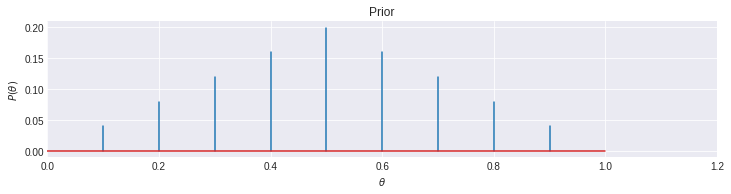

[0.00039825 0.04022302 0.08004779 0.11987256 0.15969733 0.1995221
 0.15969733 0.11987256 0.08004779 0.04022302 0.00039825]


In [36]:
"""
Bayesian updating of beliefs about the bias of a coin. The prior and posterior
distributions indicate probability masses at discrete candidate values of theta.
"""
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# theta is the vector of candidate values for the parameter theta.
n_theta_vals = 11
# Now make the vector of theta values:
theta = np.linspace(0, 1, n_theta_vals )

# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.minimum(theta, 1-theta)+.001  # Makes a triangular belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.


# Plot the results.
plt.figure(figsize=(12, 11))
plt.subplots_adjust(hspace=0.7)

# Plot the prior:
plt.subplot(3, 1, 1)
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0, 1.2)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')
plt.show()

print(p_theta)

You'll notice that this is a probability *mass* function, with probability values at discrete values that sum to one. 

### Data

Below in the next bit of code is the Data we observe. Here, we observe 1 coin-toss, which came up heads.

In [43]:
n_heads = 100
n_tails = 1

### Likelihood function and generative models

Likelihood functions, denoted in Bayes' by $p(Data|\theta)$ can be thought of as part of the essence of a generative model. A generative model is a formal description of a mechanism that can generate observable data and is contingent upon parameter settings within the mechanism. For instance, in a reinforcement learning setting, the mechanism generating the data could be Q-learning algorithms. Inputting data and parameters into these algorithms can generate probabilities in the form $p(data|\theta,model)$.


Here, we'll use the Bernoulli likelihood function as a way to generate data. We use this because it's suited exactly for what we're studying: a single, binary response. One can think of Bernoulli as defining the likelihood that one of the two binary outcomes is favored due to a bias term, denoted here as $\theta$.

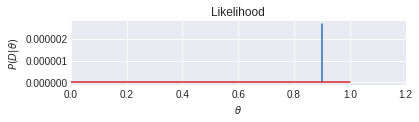

In [50]:
# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

#Plot the likelihood
plt.subplot(3, 1, 2)
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0, 1.2)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.show()

Note that although we previously computed Bayes' theorem on a single value in the example with objects being drawn from a hat, here, Bayes' theorem is computed on a *distribution*.

One line of code accomplishes this for the likelihood function above, but it's helpful to think of Bayes' theorem being computed iteratively on all candidate $\theta$ values defined by the prior distribution over $\theta$.

### Marginal likelihood
Think about how hard this would be to the extent that we have multiple parameters...

In [48]:
# Compute the marginal likelihood
p_data = np.sum(p_data_given_theta * p_theta)

### Posterior: Re-allocating credibility

Now since we have all the pieces of Bayes theorem we can use it to reallocate credibility (probability) to candidate $\theta$ values that serve to explain our data (again that we saw a coin-flip come up heads). 

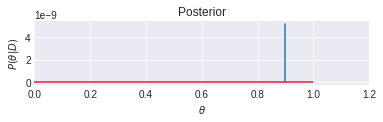

In [51]:
# Compute the posterior:
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

# Plot the posterior:
plt.subplot(3, 1, 3)
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0, 1.2)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior')
plt.show()

### How the prior affects the posterior

(1) Try plugging in 1000 heads for the data. Then run the rest of the code. What do you notice, and why?

(2) Change the prior to favor tails. What do you notice about the posterior with 10 heads, and why?

### How sample size affects precision
Notice how the number of heads and tails affects the distribution by changing the "data" block. 

### Specifying a prior distribution by finding a meaningful functional form

Although we've dealth with a simple prior distribution to illustrate Bayesian re-allocation of credibilities across possible parameters, we have not yet dealt with the idea of specifying typical prior, continuous distributions. 

To do this, we need to find a distribution that satisfies two conditions for a good 'mathematical description' of the data: (1) The form of the distribution should be "comprehensible with meaningful parameters" (Kruschke p.24). (2) the distribution should be "descriptively accurate" in that it "looks like" the distribution of one's actual data. 

The beta distribution is a good candidate because it satisfies these conditions **for our data**. The beta distribution has a scale ranging from 0 to 1 (which is the natural range of coin biases) and is defined by two meaningful parameters, $a$ and $a$, that control the prior bias to favor either $\theta=0$, via an increasing $b$ or favoring $\theta=1$ via an increasing $a$.

Formally the beta distribution is defined as such:
$\theta^{(a-1)}\,(1-\theta)^{(b-1)} \, / \, B(a,b)$

where $B(a,b)=\int_{0}^{1}{d\theta}\,\theta^{(a-1)}\,(1-\theta)^{(b-1)}$


The mathematical details aren't of much interest, but what is is that the beta *distribution* is different from the beta *function*. The latter, defined as $B(a,b)$ ensures that the probability density function beta$(\theta|a,b)$ integrates to 1 (see point above on probability denisities).

For more info on using beta distirbution to compute a posterior over likely $\theta$ values, see here: https://github.com/aloctavodia/Doing_bayesian_data_analysis/blob/master/05_BernBeta.py

Let's run the following code to see what happens when we input the $\theta=[0.9,0.7,0.5,0.3,0.1]$ into a beta density functions with parameters $a=4\,,\,b=4$




In [10]:
from scipy.stats import beta

beta.pdf([0.9,0.7,0.5,0.3,0.1],4,4)

array([0.10206, 1.29654, 2.1875 , 1.29654, 0.10206])

Assuming the higest number is the peak of the distribution, what can we say with the output of the function? Why are some outputs greater than 1? What can we infer about the coin if this is the true underlying distribution of real $\theta$ values?

### Ways to solve for a posterior distribution over parameters

The most difficult part of estimating posteriors is to solve for the marginal likelihood, given that it requires integration over potentially many parameters. 

1. **Analytical**
    - When the functional form of the likeihood * prior is equivalent to the prior, the prior and likelihood are said to be "conjugate" and the marginal likelihood can be computed analytically. This means there is a mathemtical equation that one can leverage to solve for the posterior without difficult or incalculable integration.Such is the case with a beta prior and Bernoulli likelihood as was the case in the example above tossing coins. 
   
   
2. **Numerical approimation via a grid of relevant parameters points**
    - The integral is approximated by a sum of several discrete values. This is what we did in the example above even though we could have computed the posterior analytically. 


### Next week: Solving Bayes by approximation

We will dive into estimating models with multiple parameters, and as such requires new techniques.

For instance $p(\theta,\beta,\alpha,\mu,\gamma,\delta|data)$ is a 6-dimensional joint probability space to estimate (again this is just a generalization of the 1-dimensional scenario we've been working with). If the solution 

